In [1]:
import torch
import random
import torchvision
from torchvision import datasets, transforms
import torch.nn as nn
import torch.nn.functional as F
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import huffman
import math
import faiss
import sys
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)
import warnings
warnings.filterwarnings('ignore')

# ImageNet Experiments: Size reduction  through Huffman coding

In [2]:
def plot_pdf_distribution(pdf):
    print(len(pdf))
    plt.rcParams['figure.figsize'] = [4,3]
    plt.rcParams['figure.dpi'] = 120 # 200 e.g. is really fine, but slower
    plt.rcParams.update({'font.size': 10})
    # plt.ticklabel_format(axis='x', style="sci", scilimits=(0,0), useOffset=False)
    # plt.hist(imagenet_pdf2048, bins=25, alpha=0.75, rwidth=0.75)
    # plt.gca().set(ylabel='# of centroids in that bin', xlabel='# of centroids in a bin is hit', xscale='log', autoscale_on=True);
    plt.ticklabel_format(style='plain')
    plt.hist(pdf, bins=25, alpha=0.75, rwidth=0.75) #, log=True)
    plt.gca().set(ylabel='# of centroids in that bin', xlabel='# of times centroids in a bin is hit');

In [3]:
def plot_data_savings(pdf,n_clusters):
    # create the dictionary
    freq_dict = []
    for i in range(n_clusters):
        freq_dict.append((i, pdf[i]))
    code_book = huffman.codebook(freq_dict)   

    code_book_dist = np.zeros((n_clusters,),dtype=np.int)
    for j in range(n_clusters):
        code_book_dist[j]=len(code_book[j])

    plt.rcParams['figure.figsize'] = [3,3]
    plt.rcParams['figure.dpi'] = 120 # 200 e.g. is really fine, but slower
    plt.rcParams.update({'font.size': 10})
    plt.ticklabel_format(style='plain')
    plt.hist(code_book_dist, bins=6, alpha=0.75, rwidth=0.75)
    plt.gca().set(ylabel='# of symbols in that bin', xlabel='bins of bits per symbol');    

    base_bits = (math.log10(n_clusters) / math.log10(2))
    print(base_bits)

    # with no encoding, 11 bits needed to encode 2048 symbols
    total_non_encoded = 0
    for i in range(n_clusters):
        total_non_encoded += pdf[i]*base_bits

    total_encoded = 0
    for i in range(n_clusters):
        total_encoded += pdf[i]*code_book_dist[i]
    return 100*(1 - total_encoded/total_non_encoded)

2048


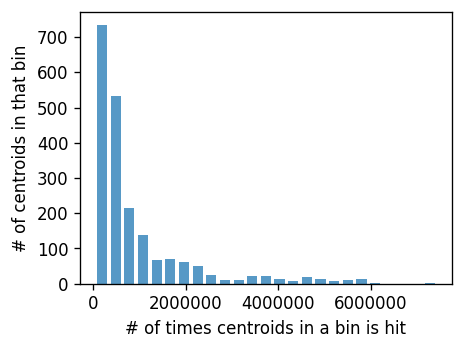

In [4]:
imagenet_pdf2048 = np.genfromtxt('./imagenet_pdf2048.txt', delimiter=',')
plot_pdf_distribution(imagenet_pdf2048)

11.0
Savings in storage for Imagenet (50k) testset: 6.65%


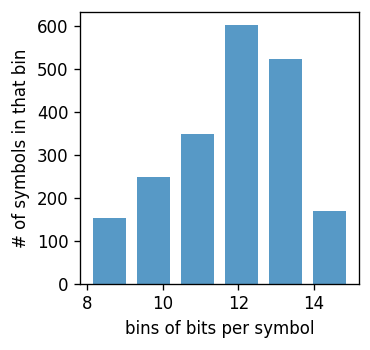

In [5]:
savings = plot_data_savings(imagenet_pdf2048,2048)
print("Savings in storage for Imagenet (50k) testset: {:.2f}%".format(savings))    